## ĐỒ ÁN CUỐI KỲ - CSC17104: LẬP TRÌNH KHOA HỌC DỮ LIỆU
### TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN - ĐHQG-HCM
#### Khoa Công nghệ Thông tin

**Tên đề tài:** Phân tích Xu hướng Âm nhạc Toàn cầu trên Spotify (2009-2025)
**Bộ dữ liệu:** Spotify Global Music Dataset 2009-2025

**Danh sách thành viên nhóm:**
1. 23120038 - Lê Hoàng Mỹ Hạ
2. 23120084 - Nguyễn Mạnh Thắng 
---

## 1. Thu thập dữ liệu (Data Collection)

### Tổng quan về bộ dữ liệu
* **Chủ đề:** Dữ liệu này mang đến những góc nhìn về cách xu hướng âm nhạc, mức độ phổ biến của nghệ sĩ và các thể loại đã thay đổi theo thời gian, bao gồm cả những ca khúc đương đại năm 2025 và những bản hit vượt thời gian giai đoạn 2009–2023.
* **Ngữ cảnh thực tế:** Dữ liệu đại diện cho hành vi tiêu thụ âm nhạc toàn cầu và đặc điểm âm nhạc của các bài hát thịnh hành trong hơn 15 năm qua.

### Nguồn gốc
* **Nền tảng:** Kaggle
* **URL:** https://www.kaggle.com/datasets/wardabilal/spotify-global-music-dataset-20092025
* **Tác giả:** Warda Bilal

### Giấy phép & Sử dụng
* **Giấy phép:** CCO [[text](https://creativecommons.org/publicdomain/zero/1.0/)]
* **Quyền sử dụng:** Được phép sử dụng cho mục đích giáo dục trong môn học này.

### Thu thập dữ liệu
* **Phương pháp thu thập:** Dữ liệu được thu thập thông qua Spotify Web API công khai, bằng các truy vấn lập trình để lấy thông tin về bài hát, nghệ sĩ, album và đặc trưng âm thanh.
* **Đối tượng và cách lấy mẫu:** Đối tượng là các bài hát và nghệ sĩ trên nền tảng Spotify toàn cầu.
Dữ liệu được chọn lọc không ngẫu nhiên, tập trung vào các bài hát phổ biến, đại diện cho xu hướng âm nhạc giai đoạn 2009–2025.

* **Thời gian:** 
    * Thời gian phát hành nhạc: 2009–2025
    * Dữ liệu được trích xuất tại thời điểm tạo bộ dữ liệu (sau năm 2023).

* **Hạn chế và thiên lệch:**
    * Thiên lệch về độ phổ biến (ưu tiên các bài hát nổi tiếng)
    * Chỉ phản ánh xu hướng trên Spotify, không đại diện toàn bộ thị trường âm nhạc
    * Một số chỉ số có thể thay đổi theo thời gian do giới hạn của API

### Lý do chọn đề tài
* Âm nhạc là chủ đề phổ biến và dễ tiếp cận.
* Bộ dữ liệu có sự kết hợp tốt giữa dữ liệu số và dữ liệu phân loại (nghệ sĩ, thể loại).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter
import warnings

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
try:
    df = pd.read_csv('spotify_data_clean.csv')
    print("Đã tải dữ liệu thành công!")
except FileNotFoundError:
    print("Không tìm thấy file.")

Đã tải dữ liệu thành công!


## 2. Data Exploration

### 2.1 Tổng quan về Bộ dữ liệu

#### 1. Thông tin cơ bản 

 - Số dòng, số cột

In [3]:
nrows,ncolumns = df.shape
print(f"Số dòng: {nrows}, Số cột: {ncolumns}")
df.head()

Số dòng: 8582, Số cột: 15


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


 - Mỗi dòng đại diện cho điều gì?  
→ Mỗi dòng tương ứng với một bài hát cụ thể (được định danh bằng track_id), bao gồm các trường dữ liệu sau: 

 - Kích thước dữ liệu:

In [4]:
import os
file_path="spotify_data_clean.csv"
size_bytes=os.path.getsize(file_path)
size_kb= size_bytes/(1024)
print(f"Kích thước dữ liệu: {size_kb:.2f} KB")

Kích thước dữ liệu: 1377.51 KB


#### 2. Tính toàn vẹn dữ liệu

 * Có dòng dữ liệu nào bị trùng lặp không? Nếu có, có bao nhiêu dòng?

In [5]:
dup_count=df.duplicated().sum()
print(f"Số dòng trùng: {dup_count}")

Số dòng trùng: 0


* Tất cả các dòng dữ liệu có đầy đủ thông tin không, hay có dòng nào bị trống hoàn toàn?

In [6]:
df = df.replace(r'^\s*$', pd.NA, regex=True)
empty_rows = df.isna().all(axis=1).sum()
print(f"Số dòng trống: {empty_rows}")

Số dòng trống: 0


#### 3. Danh mục cột dữ liệu

 * Ý nghĩa/định nghĩa của từng cột là gì?

| Trường dữ liệu | Ý nghĩa |
|--------------|--------|
| `track_id` | Mã định danh duy nhất của bài hát trên Spotify |
| `track_name` | Tên bài hát |
| `track_number` | Thứ tự của bài hát trong album |
| `track_popularity` | Mức độ phổ biến của bài hát trên Spotify (0–100) |
| `explicit` | Cho biết bài hát có nội dung nhạy cảm hay không |
| `artist_name` | Tên nghệ sĩ chính |
| `artist_popularity` | Mức độ phổ biến của nghệ sĩ trên Spotify (0–100) |
| `artist_followers` | Số lượng người theo dõi nghệ sĩ |
| `artist_genres` | Các thể loại âm nhạc của nghệ sĩ |
| `album_id` | Mã định danh của album |
| `album_name` | Tên album |
| `album_release_date` | Ngày phát hành album |
| `album_total_tracks` | Tổng số bài hát trong album |
| `album_type` | Loại album (album / single / compilation) |
| `track_duration_min` | Thời lượng bài hát (tính bằng phút) |


 * Những cột nào phù hợp và hữu ích cho việc phân tích?  
   
   
    - `track_popularity`: Biến mục tiêu hoặc biến so sánh mức độ thành công của bài hát
    - `explicit`: Phân tích ảnh hưởng của nội dung nhạy cảm đến độ phổ biến
    - `artist_popularity`: So sánh mức độ nổi tiếng của nghệ sĩ
    - `artist_followers`: Phân tích mối quan hệ giữa lượng fan và độ phổ biến bài hát
    - `artist_genres`: Phân tích theo thể loại, xu hướng âm nhạc
    - `album_release_date`: Phân tích theo thời gian (năm phát hành, xu hướng qua các giai đoạn)
    - `album_total_tracks`: So sánh cấu trúc album và mức độ thành công
    - `album_type`: So sánh hiệu suất giữa album, single, compilation
    - `track_duration_min`: Phân tích độ dài bài hát theo thể loại hoặc độ phổ biến
    - `track_number`: Phân tích vị trí bài hát trong album (opening track vs. later tracks)

 * Có cột nào nên được loại bỏ không? Vì sao?  
   

    - `track_id`: Chỉ dùng để định danh, không mang ý nghĩa phân tích
    - `album_id`: Mã định danh album, không mang thông tin phân tích
    - `track_name`: Dữ liệu dạng văn bản, chỉ dùng để hiển thị
    - `artist_name`: Tên riêng, không dùng trực tiếp cho mô hình

#### 4. Kiểu dữ liệu (Data Types)

 * Kiểu dữ liệu hiện tại của từng cột là gì?

In [7]:
df.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [8]:
df.dtypes

track_id               object
track_name             object
track_number            int64
track_popularity        int64
explicit                 bool
artist_name            object
artist_popularity       int64
artist_followers        int64
artist_genres          object
album_id               object
album_name             object
album_release_date     object
album_total_tracks      int64
album_type             object
track_duration_min    float64
dtype: object

 * Có cột nào đang dùng kiểu dữ liệu không phù hợp không?  
 → Cột `album_release_date` với kiểu dữ liệu object

 * Những cột nào cần được chuyển đổi kiểu dữ liệu?
    - `album_release_date` về datetime

In [9]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])
df['album_release_date'].dtypes

dtype('<M8[ns]')

### 2.2 Phân tích biến số số (numerical)  

#### 1. Phân bố & Xu hướng trung tâm (Distribution & Central Tendency)

 * Hình dáng dữ liệu 
 * Trực quan hóa dữ liệu

In [10]:
num_cols = ['track_number','track_popularity','artist_popularity','artist_followers','album_total_tracks','track_duration_min']

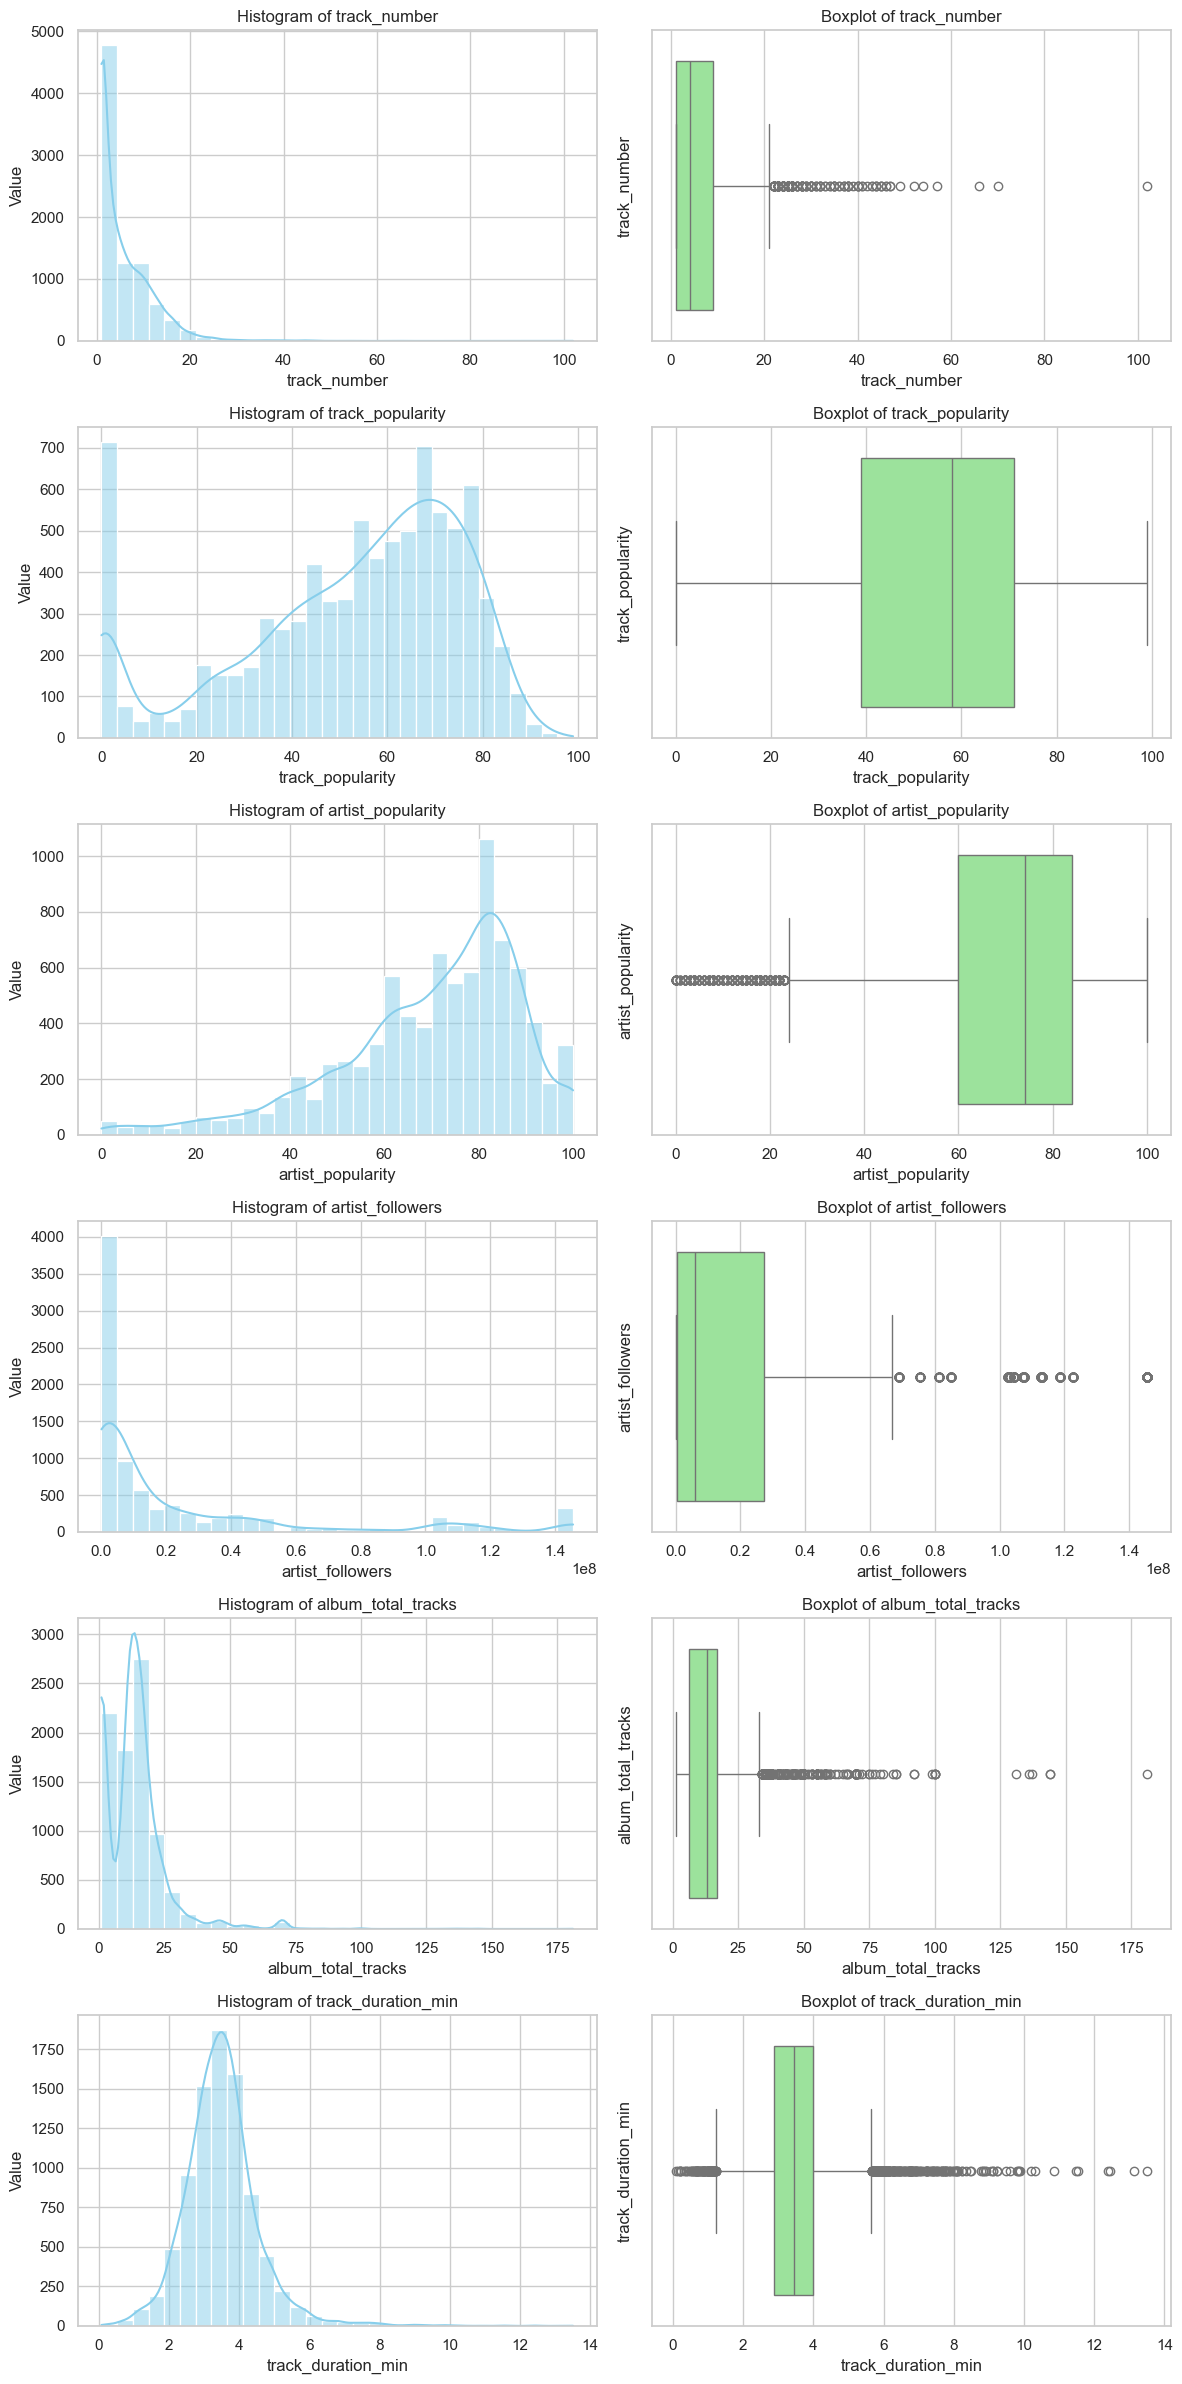

In [11]:

n_cols = len(num_cols)
fig, axes = plt.subplots(nrows=n_cols, ncols=2, figsize=(12,4*n_cols))

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde = True, bins =30, color ='skyblue', ax = axes[i,0])
    axes[i,0].set_title(f'Histogram of {col}')
    axes[i,0].set_xlabel(col)
    axes[i,0].set_ylabel('Value')
    
    sns.boxplot(x=df[col], color='lightgreen', ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot of {col}')
    axes[i,1].set_ylabel(col)
    
plt.tight_layout()
plt.show()

 * Tính toán các giá trị: mean, median, std

In [12]:
dist_dict = {}
for col in num_cols:
    dist_dict[col] = {
        'mean': df[col].mean(),
        'median':df[col].median(),
        'std':df[col].std()
    }

dist_df = pd.DataFrame(dist_dict).T
dist_df = dist_df.round(2)
dist_df

,mean,median,std
track_number,5.77,4.00,6.05
track_popularity,52.36,58.00,23.82
artist_popularity,69.73,74.00,19.65
artist_followers,24034719.33,6105547.00,38031804.96
album_total_tracks,13.79,13.00,11.89
track_duration_min,3.49,3.44,1.06


#### 2. Range & Outliers

 * Giá trị nhỏ nhất và lớn nhất là bao nhiêu?

In [13]:
range_dict = {}
for col in num_cols:
    range_dict[col] = {
        'min': df[col].min(),
        'max':df[col].max()
    }

range_df = pd.DataFrame(range_dict).T
pd.options.display.float_format = '{:.2f}'.format
range_df

,min,max
track_number,1.00,102.00
track_popularity,0.00,99.00
artist_popularity,0.00,100.00
artist_followers,0.00,145542136.00
album_total_tracks,1.00,181.00
track_duration_min,0.07,13.51


 * Các giá trị min/max có hợp lý không, hay cho thấy lỗi dữ liệu?  
→ Các giá trị min/max là hoàn toàn hợp lí

 * Xác định các giá trị ngoại lai bằng biểu đồ hộp (box plot), phương pháp IQR.

In [14]:

def detect_outliers(col):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    num_outliers = outliers.shape[0]
    return lower_bound, upper_bound, num_outliers

outlier_dict = {}
for col in num_cols:
    lower, upper, count = detect_outliers(col)
    outlier_dict[col] = {
        'lower_bound': lower,
        'upper_bound': upper,
        'number_outliers': count
    }
outlier_df = pd.DataFrame(outlier_dict).T           
outlier_df

,lower_bound,upper_bound,number_outliers
track_number,-11.00,21.00,166.00
track_popularity,-9.00,119.00,0.00
artist_popularity,24.00,120.00,286.00
artist_followers,-39723026.50,67437897.50,1044.00
album_total_tracks,-10.50,33.50,379.00
track_duration_min,1.21,5.66,358.00


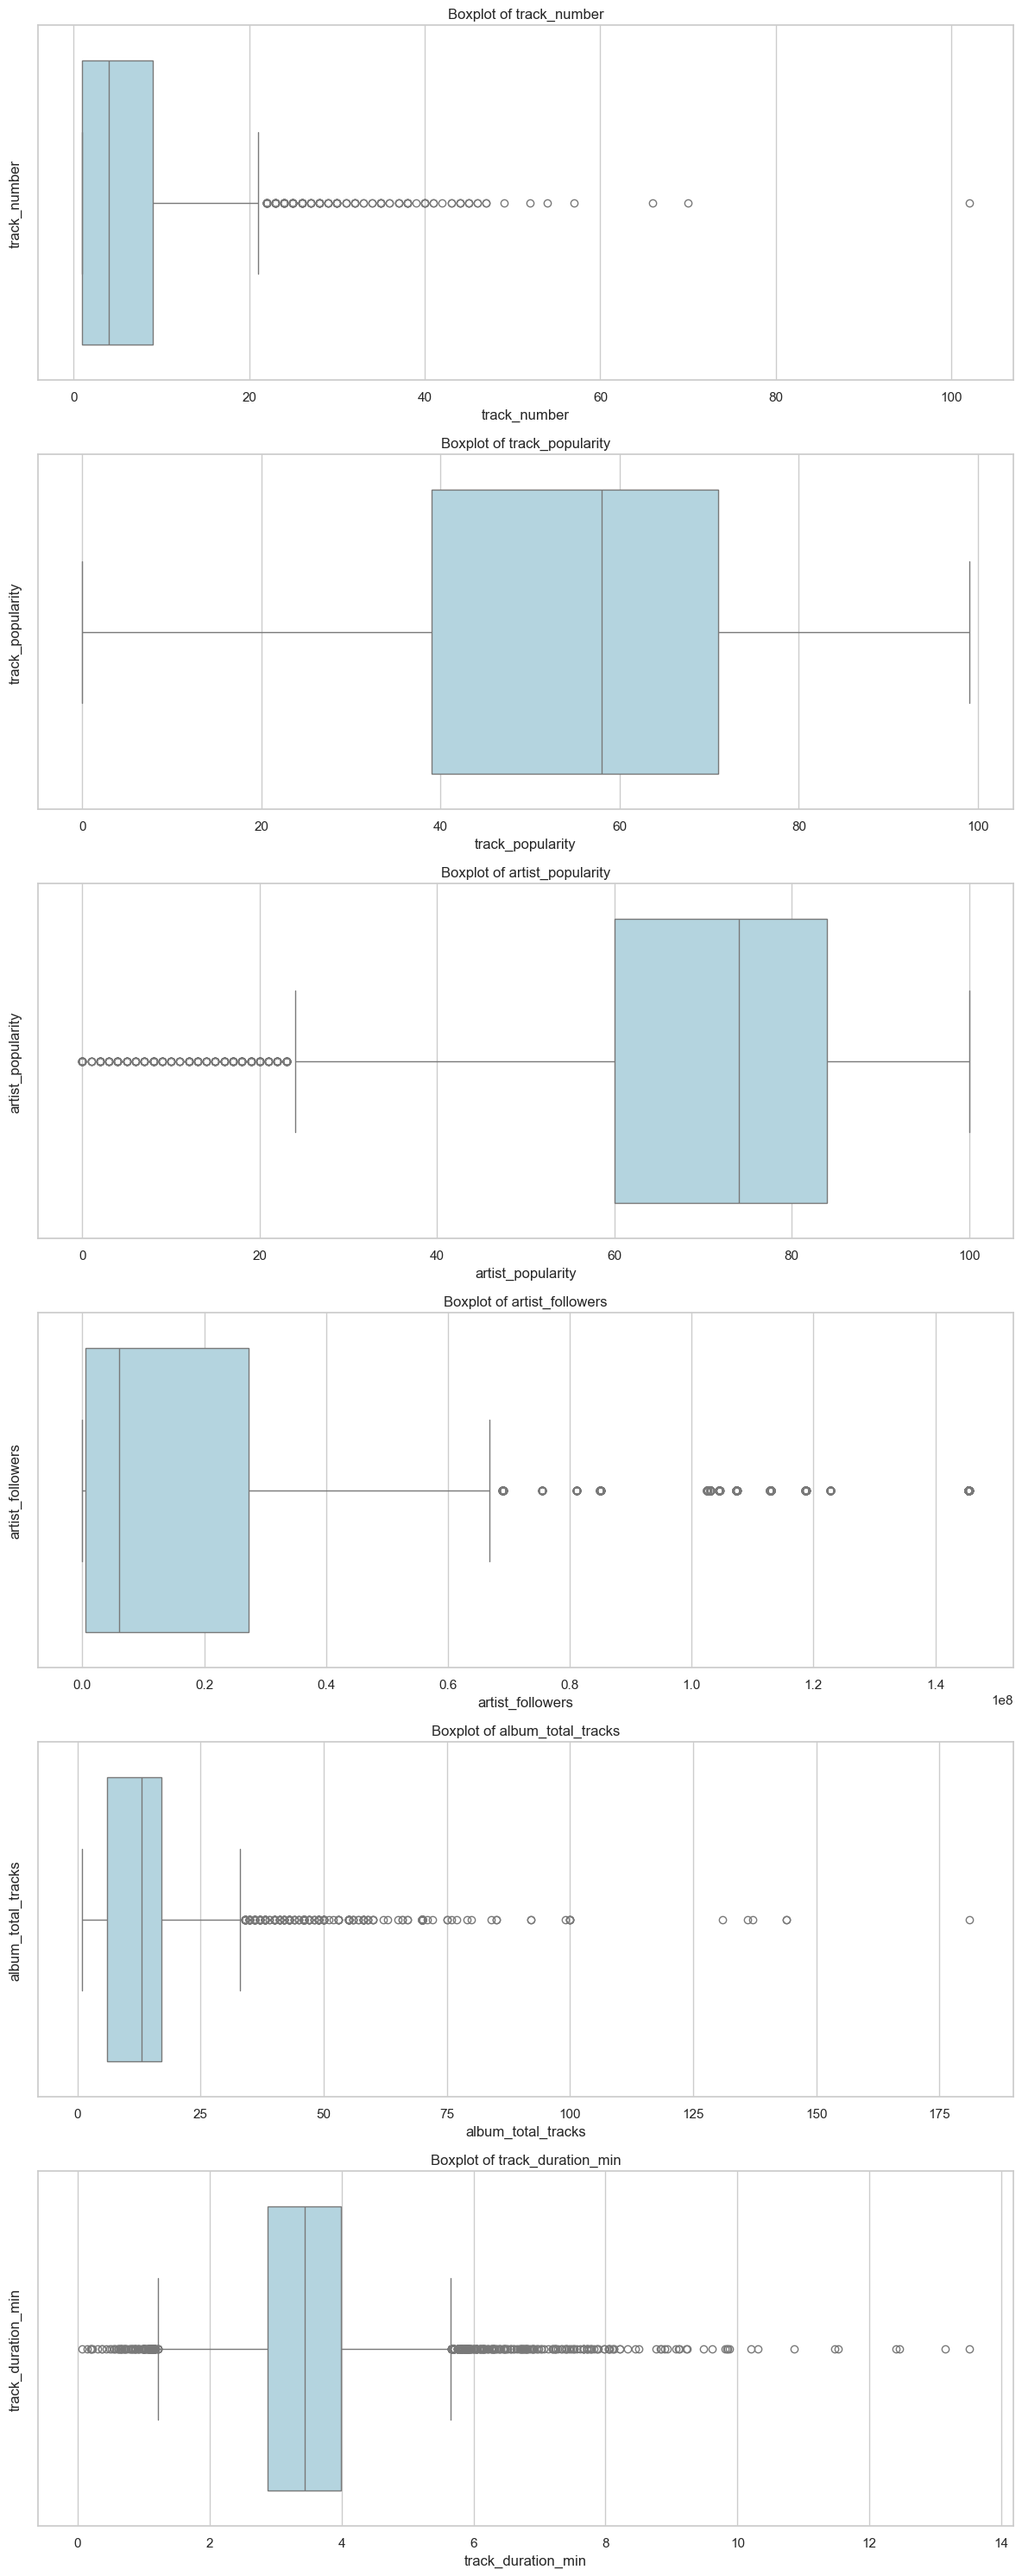

In [15]:

n_cols = len(num_cols)

fig, axes = plt.subplots(nrows=n_cols, ncols=1, figsize=(12,5*n_cols))

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], color='lightblue', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
    
plt.tight_layout()
plt.show()

 * Các giá trị ngoại lai là cực trị thật hay lỗi nhập dữ liệu?  
    * Các giá trị ngoại lai là hợp lí (vì max, min hợp lí)

3. Data Quality:

 * Bao nhiêu phần trăm giá trị bị thiếu?

In [16]:
miss_dict = {}

for col in num_cols:
    missing_count = df[col].isna().sum()
    missing_percent = round((missing_count)/len(df)*100,2)
    miss_dict[col] = {
        'missing_count': missing_count,
        'missing_percent': missing_percent
    }
miss_df = pd.DataFrame(miss_dict).T
miss_df

,missing_count,missing_percent
track_number,0.00,0.00
track_popularity,0.00,0.00
artist_popularity,0.00,0.00
artist_followers,0.00,0.00
album_total_tracks,0.00,0.00
track_duration_min,0.00,0.00


 * Có giá trị nào không hợp lệ không? (ví dụ: tuổi âm, giá bằng 0)

In [17]:

invalid_mask = (df[num_cols] < 0).any(axis=1)

if(df[invalid_mask].empty):
    print('Không có giá trị không hợp lệ')
else:
    print('Giá trị không hợp lệ')
    df[invalid_mask]

Không có giá trị không hợp lệ


* Có tồn tại các giá trị thay thế (placeholder) không?

In [18]:

placeholders = [-1,999,9999]
placeholder_mask = df[num_cols].isin(placeholders)

placeholder_counts = placeholder_mask.sum().sum()

print("Số lượng giá trị thay thế (placeholder): ", placeholder_counts)

Số lượng giá trị thay thế (placeholder):  0


### 2.3 Phân tích Cột Phân loại (Categorical Columns)

#### 1. Phân bố giá trị (Value Distribution)

In [19]:
cat_cols = ['explicit', 'artist_genres','album_type']

 * Có bao nhiêu giá trị khác nhau (unique/distinct)?

In [20]:
summary = []

for col in cat_cols:
    n_unique = df[col].nunique()
    top_val = df[col].mode().iloc[0]
    freq = df[col].value_counts().iloc[0]
    pct = (freq / len(df)) * 100

    summary.append({
        "Cột": col,
        "Số giá trị unique": n_unique,
        "Giá trị phổ biến nhất": top_val,
        "Tần suất": freq,
        "Tỷ lệ (%)": round(pct, 1)
    })

summary_df = pd.DataFrame(summary)
summary_df

,Cột,Số giá trị unique,Giá trị phổ biến nhất,Tần suất,Tỷ lệ (%)
0,explicit,2,False,6434,75.00
1,artist_genres,661,soundtrack,345,4.00
2,album_type,3,album,5856,68.20


 * 5–10 giá trị xuất hiện thường xuyên nhất là gì?

In [21]:
for col in cat_cols:
    print(f"\n=== Top 5 giá trị phổ biến nhất của cột '{col}' ===")
    display(
        df[col]
        .value_counts()
        .head(5)
        .reset_index()
        .rename(columns={'index': col, col: 'Tần suất'})
    )


=== Top 5 giá trị phổ biến nhất của cột 'explicit' ===


,Tần suất,count
0,False,6434
1,True,2148



=== Top 5 giá trị phổ biến nhất của cột 'artist_genres' ===


,Tần suất,count
0,soundtrack,345
1,pop,326
2,"country, pop, indie, folk",324
3,soft pop,199
4,rap,187



=== Top 5 giá trị phổ biến nhất của cột 'album_type' ===


,Tần suất,count
0,album,5856
1,single,2219
2,compilation,507


 * Trực quan hóa dữ liệu: bar charts, count plots

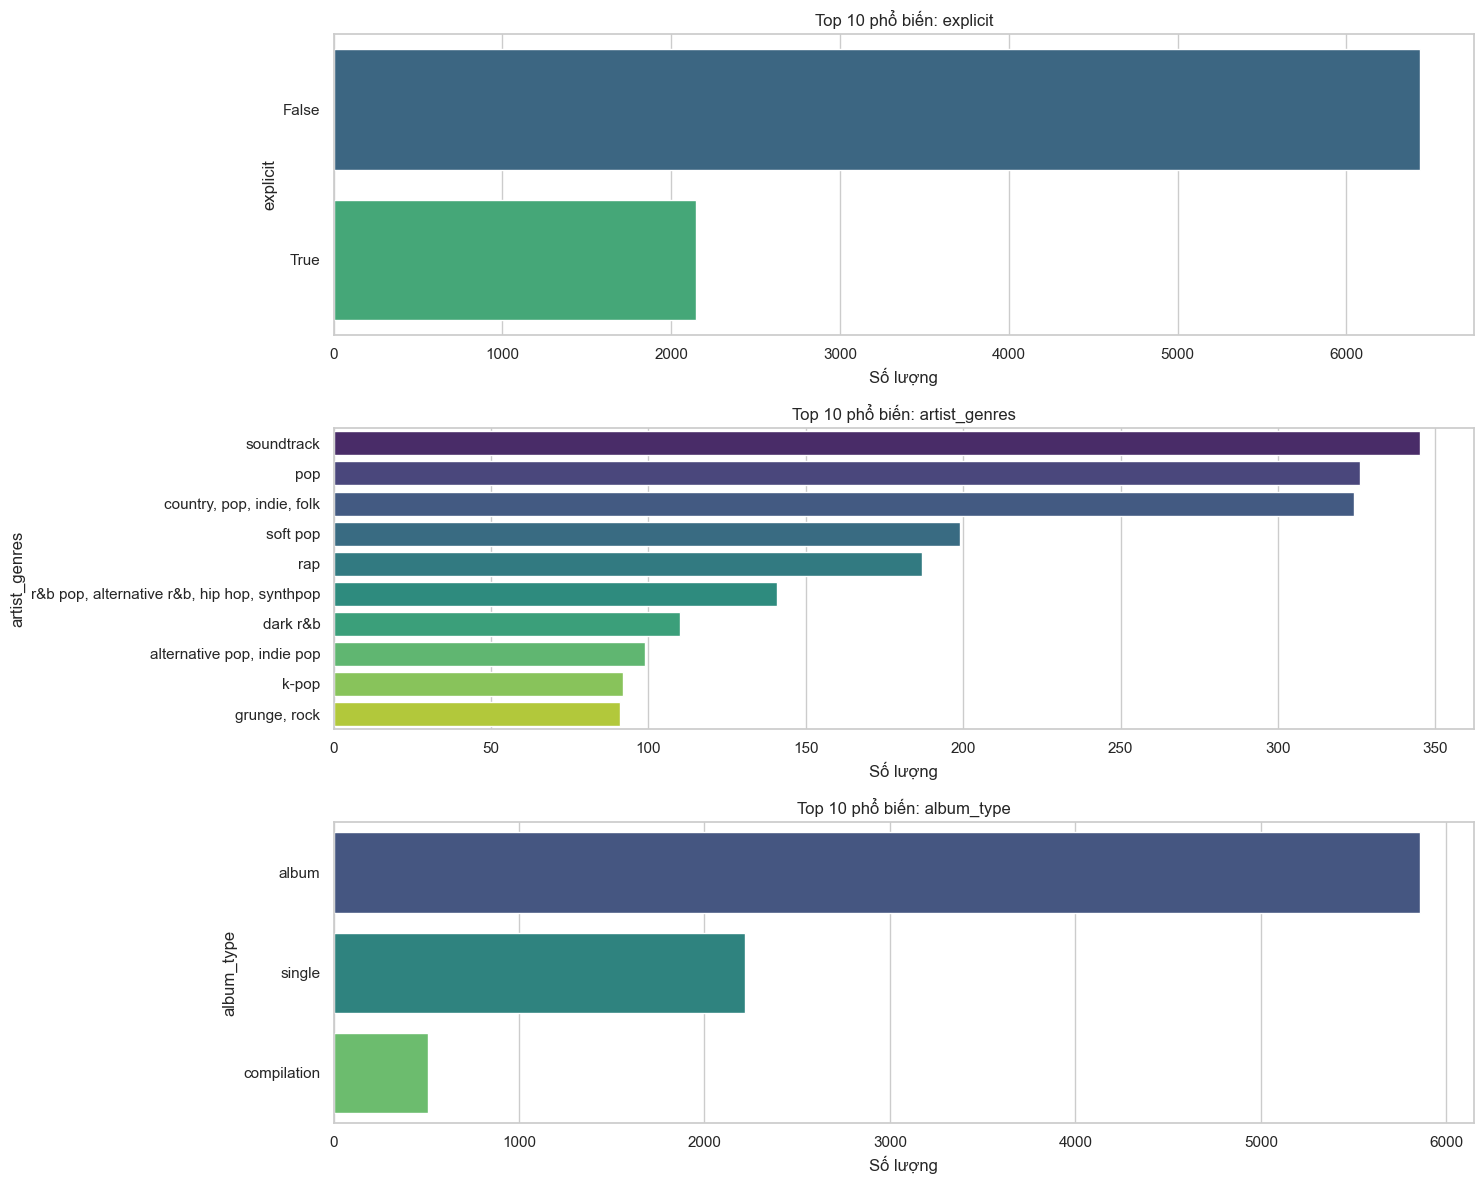

In [22]:
plt.figure(figsize=(15, 4 * len(cat_cols))) 

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i) 
    top_10 = df[col].value_counts().head(10).index
    sns.countplot(y=col, data=df, order=top_10, palette='viridis')
    
    plt.title(f'Top 10 phổ biến: {col}')
    plt.xlabel('Số lượng')

plt.tight_layout()
plt.show()

 * Phân bố dữ liệu có cân bằng hay bị mất cân bằng nghiêm trọng?
    * `explicit`: Giá trị False chiếm áp đảo so với True (Số bài hát không có nội dung nhạy cảm nhiều hơn rất nhiều)  
      → Phân phối mất cân bằng (highly imbalanced)  

    * `artist_genres`: Chỉ một số ít thể loại chiếm phần lớn dữ liệu  
      → Phân phối mất cân bằng (highly imbalanced)  
      
    * `album_type`: album chiếm đa số, single ít hơn đáng kể và compilation chiếm tỷ lệ rất nhỏ  
      → Phân phối mất cân bằng (highly imbalanced)

#### 2. Chất lượng dữ liệu 

 * Bao nhiêu phần trăm giá trị bị thiếu?
 * Có tồn tại sự không nhất quán trong các danh mục (category) không?

In [23]:
quality_data = []

for col in cat_cols:
    
    miss_count = df[col].isnull().sum()
    miss_pct = (miss_count / len(df)) * 100

    # Kiểm tra kiểu dữ liệu
    if df[col].dtype == 'object':
        n_orig = df[col].nunique()
        n_lower = df[col].str.lower().nunique()
        is_inconsistent = "CÓ LỖI" if n_orig != n_lower else "KHÔNG LỖI"
    else:
        is_inconsistent = "Không áp dụng"

    rare_count = (df[col].value_counts() <= 2).sum()

    quality_data.append([
        col, miss_count, f"{miss_pct:.1f}%", is_inconsistent, rare_count
    ])

quality_df = pd.DataFrame(
    quality_data,
    columns=['Column', 'Missing Values', '% Missing', 'Inconsistency Check', 'Rare Values (<=2)']
)

display(quality_df)


,Column,Missing Values,% Missing,Inconsistency Check,Rare Values (<=2)
0,explicit,0,0.0%,Không áp dụng,0
1,artist_genres,3361,39.2%,KHÔNG LỖI,434
2,album_type,0,0.0%,KHÔNG LỖI,0


 * Có tồn tại các giá trị bất thường hoặc không như mong đợi không?

 * Có những danh mục có rất ít quan sát không? Có nên gộp chúng lại không?  
    # → Gộp cột `artist_genres`, bạn code phần này nha

### 2.4 Missing Data  

#### 1. Đánh giá tổng quan:

* Tạo bảng tổng hợp các giá trị thiếu: tên cột, số lượng giá trị thiếu và phần trăm giá trị thiếu.

In [24]:
miss_dict = {}

for col in df.columns:
    missing_count = df[col].isna().sum()
    missing_percent = round((missing_count)/len(df)*100,2)
    miss_dict[col] = {
        'missing_count': missing_count,
        'missing_percent':missing_percent
    }
miss_df = pd.DataFrame(miss_dict).T
miss_df

,missing_count,missing_percent
track_id,0.00,0.00
track_name,0.00,0.00
track_number,0.00,0.00
track_popularity,0.00,0.00
explicit,0.00,0.00
artist_name,3.00,0.03
artist_popularity,0.00,0.00
artist_followers,0.00,0.00
artist_genres,3361.00,39.16
album_id,0.00,0.00


 * Trực quan hóa các mẫu dữ liệu bị thiếu (sử dụng heatmap hoặc biểu đồ cột).

Text(0.5, 1.0, 'Missing value heatmap')

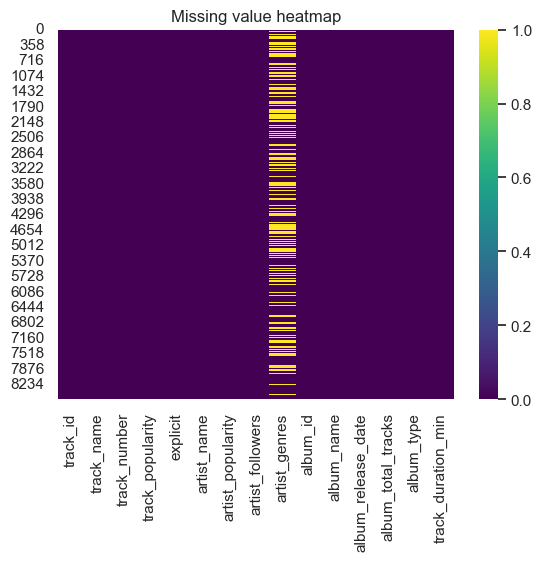

In [25]:

sns.heatmap(df.isnull(), cmap="viridis")
plt.title('Missing value heatmap')

 * Xác định xem dữ liệu bị thiếu là ngẫu nhiên hay có quy luật?  
  →Tập trung `artist_genres` và ngẫu nhiên tại `artist_name`

#### 2. Chiến lược xử lý theo từng cột:

Với mỗi cột có giá trị bị thiếu:
- Giải thích vì sao dữ liệu bị thiếu?
  - Data collection issues: Dữ liệu thu thập từ các nguồn không trả về genre cho một số artist.
  - Not applicable: artist mới, chưa phân loại genre.
  - Random: tại cột `artist_name`
- Kế hoạch xử lý:
  - Đối với `artist_genres`: Giữ cột và điền "Unknown".
  - Đối với `artist_name`: Vì khi train model sẽ xóa cột, nên điền giá trị bằng "Unknown".

In [26]:
df.fillna("Unknown")

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,Unknown,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,0AQquaENerGps8BQmbPw14,Big Iron,1,71,False,Marty Robbins,60,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,3.92
8578,4f8hBeMXMvssn6HtFAtblo,El Paso,10,64,False,Marty Robbins,61,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,4.32
8579,0Vy7wsXNFrbNc6UTWoScnM,Over the Rainbow,5,8,False,The Mystics,27,18184,doo-wop,2ifB9Xjp9DdpqLlYlY60QW,Presenting The Mystics,1959-02-11,9,compilation,2.28
8580,760clbeDBWmBsBLbszWuNZ,I'm A Man,2,55,False,Bo Diddley,44,333376,"blues, classic blues, rock and roll, rockabilly",1cbtDEwxCjMhglb49OgNBR,Bo Diddley,1958-01-01,12,album,2.74


### 2.5. Mối quan hệ & Tương quan (Relationships & Correlations)

 * Tính ma trận tương quan cho các biến số (numerical variables).

In [27]:
corr_matrix = df[num_cols].corr()
print(corr_matrix)

                    track_number  track_popularity  artist_popularity  \
track_number                1.00             -0.03               0.19   
track_popularity           -0.03              1.00               0.47   
artist_popularity           0.19              0.47               1.00   
artist_followers            0.22              0.23               0.64   
album_total_tracks          0.52             -0.05               0.20   
track_duration_min          0.07              0.11               0.21   

                    artist_followers  album_total_tracks  track_duration_min  
track_number                    0.22                0.52                0.07  
track_popularity                0.23               -0.05                0.11  
artist_popularity               0.64                0.20                0.21  
artist_followers                1.00                0.18                0.17  
album_total_tracks              0.18                1.00                0.06  
track_duration

* Tạo heatmap tương quan.

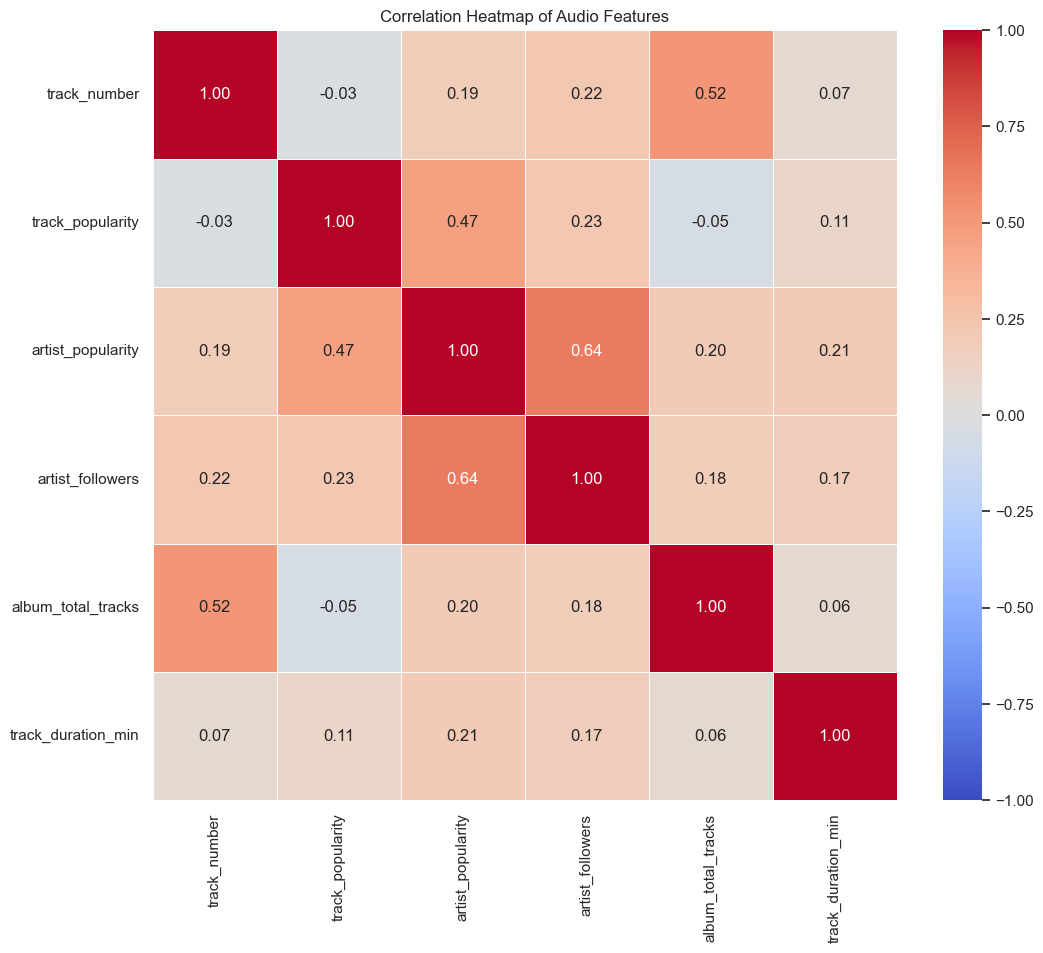

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,       
            fmt=".2f",        
            cmap='coolwarm',  
            linewidths=0.5, 
            vmin=-1, vmax=1)  
plt.title('Correlation Heatmap of Audio Features')
plt.show()

 * Xác định các cặp biến có tương quan mạnh (dương hoặc âm).

In [29]:
threshold = 0.5
print("--- CÁC CẶP BIẾN CÓ TƯƠNG QUAN MẠNH (> 0.5 hoặc < -0.5) ---")
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
strong_pairs = sorted_pairs[(abs(sorted_pairs) > threshold) & (abs(sorted_pairs) < 1.0)]

unique_pairs = []
for index, value in strong_pairs.items():
    pair = tuple(sorted(index)) 
    if pair not in unique_pairs:
        unique_pairs.append(pair)
        print(f"{index[0]} - {index[1]}: {value:.2f}")

if not unique_pairs:
    print("Không tìm thấy cặp biến nào có tương quan mạnh trên mức ngưỡng này.")

--- CÁC CẶP BIẾN CÓ TƯƠNG QUAN MẠNH (> 0.5 hoặc < -0.5) ---
artist_popularity - artist_followers: 0.64
album_total_tracks - track_number: 0.52


 * Có mối quan hệ nào bất ngờ không?

#### 2. Bảng chéo (Cross-tabulations)

 * Đối với các kết hợp quan trọng giữa các biến phân loại × phân loại (categorical × categorical), tạo bảng tần số.


--- Bảng chéo: Năm vs Nội dung nhạy cảm (Explicit) ---


explicit,False,True
year,,
2016,256,120
2017,359,99
2018,317,205
2019,345,151
2020,318,162
2021,301,142
2022,329,139
2023,365,158
2024,446,202


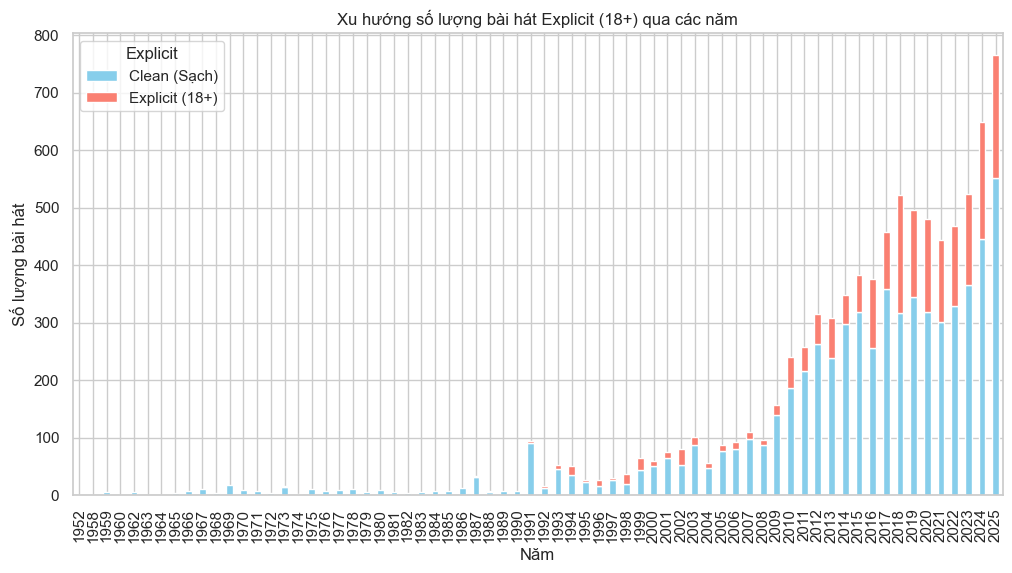

In [30]:
df['year'] = df['album_release_date'].dt.year

if 'year' in df.columns and 'explicit' in df.columns:
    print("\n--- Bảng chéo: Năm vs Nội dung nhạy cảm (Explicit) ---")
    cross_tab_explicit = pd.crosstab(df['year'], df['explicit'])
    display(cross_tab_explicit.tail(10)) 
    cross_tab_explicit.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
    plt.title("Xu hướng số lượng bài hát Explicit (18+) qua các năm")
    plt.ylabel("Số lượng bài hát")
    plt.xlabel("Năm")
    plt.legend(title='Explicit', labels=['Clean (Sạch)', 'Explicit (18+)'])
    plt.show()

elif 'year' in df.columns:
    print("Không có cột 'explicit' nhưng đã có 'year'. Hãy thử phương án phân tích khác.")
else:
    print("Vẫn chưa tạo được cột 'year' do không tìm thấy dữ liệu ngày tháng gốc.")

* Đối với các kết hợp giữa biến số × biến phân loại (numerical × categorical), tạo thống kê tóm tắt theo nhóm.


--- Thống kê 'track_popularity' theo 'artist_genres' ---
Top 10 thể loại có độ phổ biến trung bình cao nhất:


,count,mean,std,min,25%,50%,75%,max
artist_genres,,,,,,,,
pop soul,3.00,90.33,4.51,86.00,88.00,90.00,92.50,95.00
"corrido, corridos tumbados, corridos bélicos, música mexicana, sierreño, banda, electro corridos, sad sierreño",2.00,87.00,0.00,87.00,87.00,87.00,87.00,87.00
"alternative r&b, indie soul",2.00,86.50,3.54,84.00,85.25,86.50,87.75,89.00
"yacht rock, soft rock",1.00,86.00,NaN,86.00,86.00,86.00,86.00,86.00
"west coast hip hop, g-funk",1.00,86.00,NaN,86.00,86.00,86.00,86.00,86.00
"soft pop, neo soul",1.00,85.00,NaN,85.00,85.00,85.00,85.00,85.00
"brazilian funk, trap funk, funk consciente",1.00,85.00,NaN,85.00,85.00,85.00,85.00,85.00
"rock, hard rock, classic rock, rock and roll",3.00,84.67,0.58,84.00,84.50,85.00,85.00,85.00
"reggaeton, urbano latino",1.00,84.00,NaN,84.00,84.00,84.00,84.00,84.00


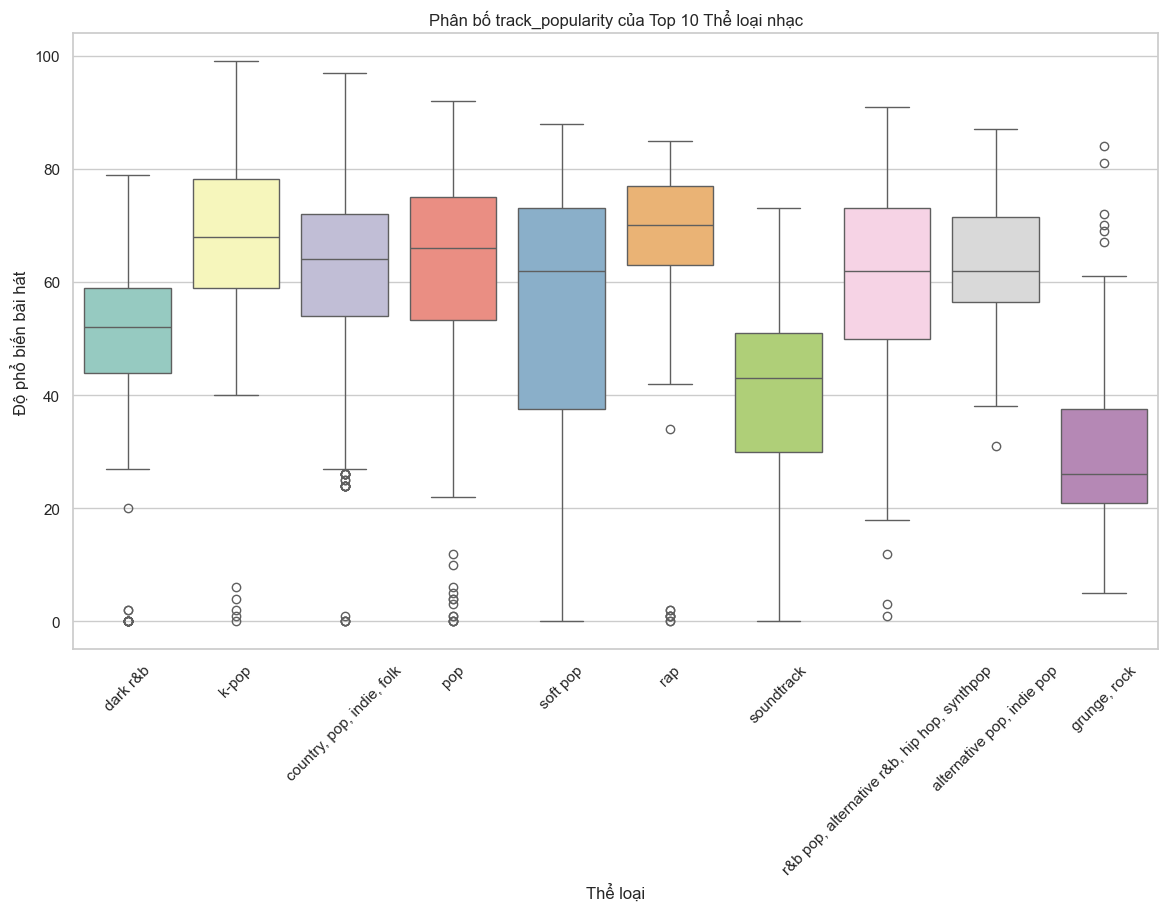

Nhận xét: Boxplot giúp ta thấy trung vị (đường giữa hộp) và các giá trị ngoại lai (các chấm đen).


In [31]:

target_pop_col = 'track_popularity' 
genre_cols = [col for col in df.columns if 'genre' in col.lower()]
target_genre_col = genre_cols[0] if genre_cols else None
if target_genre_col and target_pop_col in df.columns:
    print(f"\n--- Thống kê '{target_pop_col}' theo '{target_genre_col}' ---")
    group_stats = df.groupby(target_genre_col)[target_pop_col].describe().sort_values(by='mean', ascending=False)
    
    print("Top 10 thể loại có độ phổ biến trung bình cao nhất:")
    display(group_stats.head(10)) 
    plt.figure(figsize=(14, 8))

    top_genres = df[target_genre_col].value_counts().nlargest(10).index
    df_top_genres = df[df[target_genre_col].isin(top_genres)]
    
    sns.boxplot(x=target_genre_col, y=target_pop_col, data=df_top_genres, palette="Set3")
    plt.title(f'Phân bố {target_pop_col} của Top 10 Thể loại nhạc')
    plt.xlabel('Thể loại')
    plt.ylabel('Độ phổ biến bài hát')
    plt.xticks(rotation=45)
    plt.show()
    
    print("Nhận xét: Boxplot giúp ta thấy trung vị (đường giữa hộp) và các giá trị ngoại lai (các chấm đen).")

else:
    print(f"LỖI: Không tìm thấy cột '{target_pop_col}' hoặc cột Genre nào trong dataset.")
    print("Danh sách cột hiện có:", df.columns.tolist())

### 2.6 Initial Observations & Insights
1. Tóm tắt
- Tóm tắt các điểm nổi bật:
  - Bộ dữ liệu chứa thông tin hơn 8.000 bài hát, phân bố trên nhiều nghệ sĩ, album và thể loại nhạc khác nhau, tạo điều kiện phân tích đa dạng về âm nhạc và hành vi nghe nhạc.
  - Các trường dữ liệu cơ bản đều được điền đầy đủ (ngoại trừ `artist_genres` với tỉ lệ thiếu là $39$ %), bao gồm thông tin về track, artist, album, popularity, explicit → thuận lợi cho xử lý và phân tích thống kê.
- Vấn đề chất lượng dữ liệu đã phát hiện:
  - Thiếu thông tin thể loại nhạc (artist_genres) → cần gán mặc định "Unknown".
  - Không có missing value ở các cột số (`track_popularity`, `artist_popularity`, `artist_followers`,`album_total_tracks`, `track_duration_min`) → thuận lợi cho phân tích định lượng.
- Các bước tiền xử lý cần thiết:
  - Điền missing value cho `artist_genres` và `artist_name` bằng "Unknown".
- Các mẫu hình thú vị dẫn đến câu hỏi nghiên cứu:
  - Mối quan hệ giữa popularity và đặc điểm nghệ sĩ.
  - Các yếu tố ảnh hưởng đến `track_popularity`.

2. Cảnh báo dữ liệu (Red Flags)
- Các vấn đề nghiêm trọng về chất lượng dữ liệu:
  - `artist_genres` bị thiếu khoảng 39% → ảnh hưởng khi phân tích theo thể loại nhạc hoặc nhóm nghệ sĩ.
  - Dữ liệu lệch trái đối với các cột `track_number`, `artist_followers`, `album_total_tracks`
- Các hạn chế có thể ảnh hưởng đến phân tích:
  - `artist_followers` và `track_popularity` có thể thay đổi theo thời gian -> dữ liệu là snapshot tại một thời điểm, không phản ánh thay đổi thực tế.
  - Không có thông tin về quốc gia phát hành hoặc khu vực địa lý -> không thể phân tích sự khác biệt vùng miền hoặc quốc tế.

# 3. Question fomulation 

### 3.1. Nghệ sĩ có nhiều người theo dõi hơn (artist_followers) có bài hát phổ biến hơn không?

In [32]:
corr_value = df['artist_followers'].corr(df['track_popularity'])
corr_rounded = round(corr_value, 3)

print(f"Hệ số tương quan giữa artist_followers và track_popularity: {corr_rounded}")

if abs(corr_value) < 0.3:
    print("→ Tương quan rất yếu (gần như không liên hệ).")
elif abs(corr_value) < 0.5:
    print("→ Tương quan yếu.")
elif abs(corr_value) < 0.7:
    print("→ Tương quan trung bình.")
else:
    print("→ Tương quan mạnh.")


Hệ số tương quan giữa artist_followers và track_popularity: 0.232
→ Tương quan rất yếu (gần như không liên hệ).


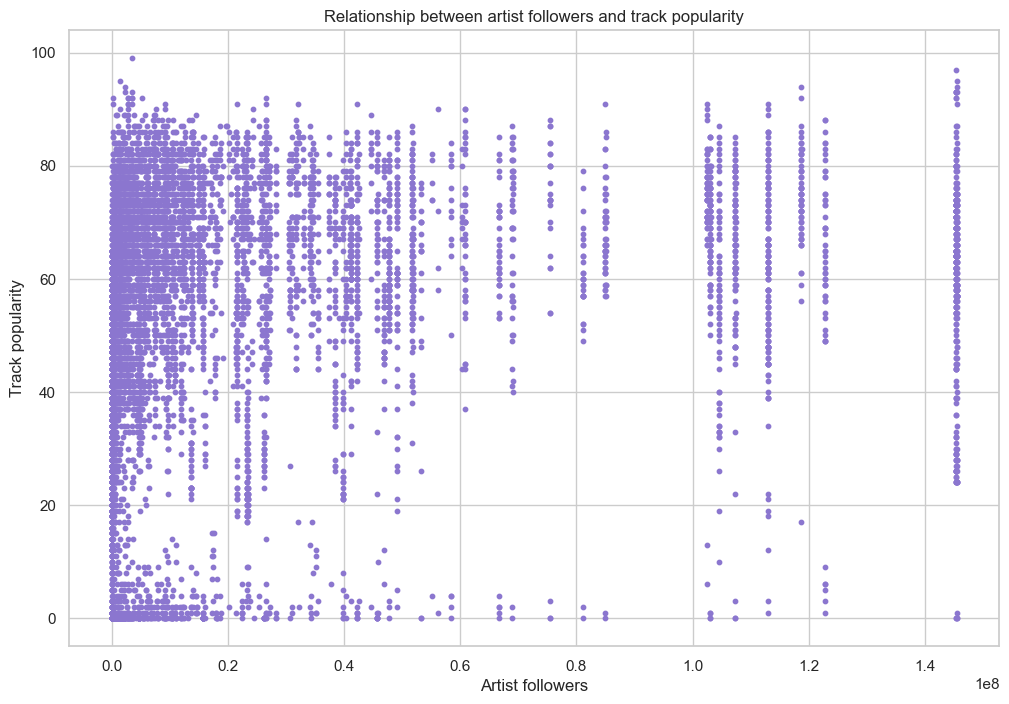

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(df['artist_followers'], df['track_popularity'],color = "#8B76CF", s = 10)
plt.xlabel("Artist followers")
plt.ylabel("Track popularity")
plt.title("Relationship between artist followers and track popularity")
plt.show()

Kết luận:
1. Không có mối quan hệ tuyến tính rõ ràng giữa `artist_followers` và `track_popularity`  
Biểu đồ phân tán rất loang rộng, cho thấy rằng:
- Nghệ sĩ có ít followers vẫn có thể sở hữu những bài hát rất nổi tiếng (popularity 70–90).
- Nghệ sĩ có nhiều followers cũng có một số bài có mức popularity thấp.  
-> Điều này cho thấy số lượng người theo dõi nghệ sĩ không quyết định trực tiếp độ phổ biến của từng bài hát.

2. Tuy nhiên vẫn có xu hướng nhẹ  
Dù không tuyến tính mạnh, nhưng:
- Nhóm nghệ sĩ có trên 50 triệu followers thường có nhiều bài đạt popularity cao (60–90).
- Nghệ sĩ có lượng followers rất thấp hiếm khi có những bài đạt popularity trên 80.  
-> Nghĩa là followers cao giúp tăng khả năng bài hát được chú ý, nhưng không đảm bảo bài nào cũng nổi.

3. Sự phân nhóm theo mức followers  

- Rất nhiều điểm tập trung dày ở mức followers < 20 triệu (đa số nghệ sĩ).
- Một vài cột dọc rõ rệt ở 100M+, 130M+ followers (những superstars).
- Nhưng ngay cả trong nhóm "superstars", mức độ popularity vẫn dao động mạnh, không tụ lại ở 100.


### 3.2. Xu hướng sáng tác các thể loại âm nhạc (genres) thay đổi như thế nào theo thời gian trên Spotify?

In [34]:
df_exploded = df.copy()
df_exploded['artist_genres'] = df_exploded['artist_genres'].str.split(',')
df_exploded = df_exploded.explode('artist_genres')
df_exploded['artist_genres'] = df_exploded['artist_genres'].str.strip()
df_exploded.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min,year
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55,2025
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,country hip hop,4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07,2025
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,southern hip hop,4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07,2025
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55,2025
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69,2025


In [35]:
top_genres = (
    df_exploded['artist_genres']
    .value_counts()
    .head(10)
    .index
)

df_top = df_exploded[df_exploded['artist_genres'].isin(top_genres)]

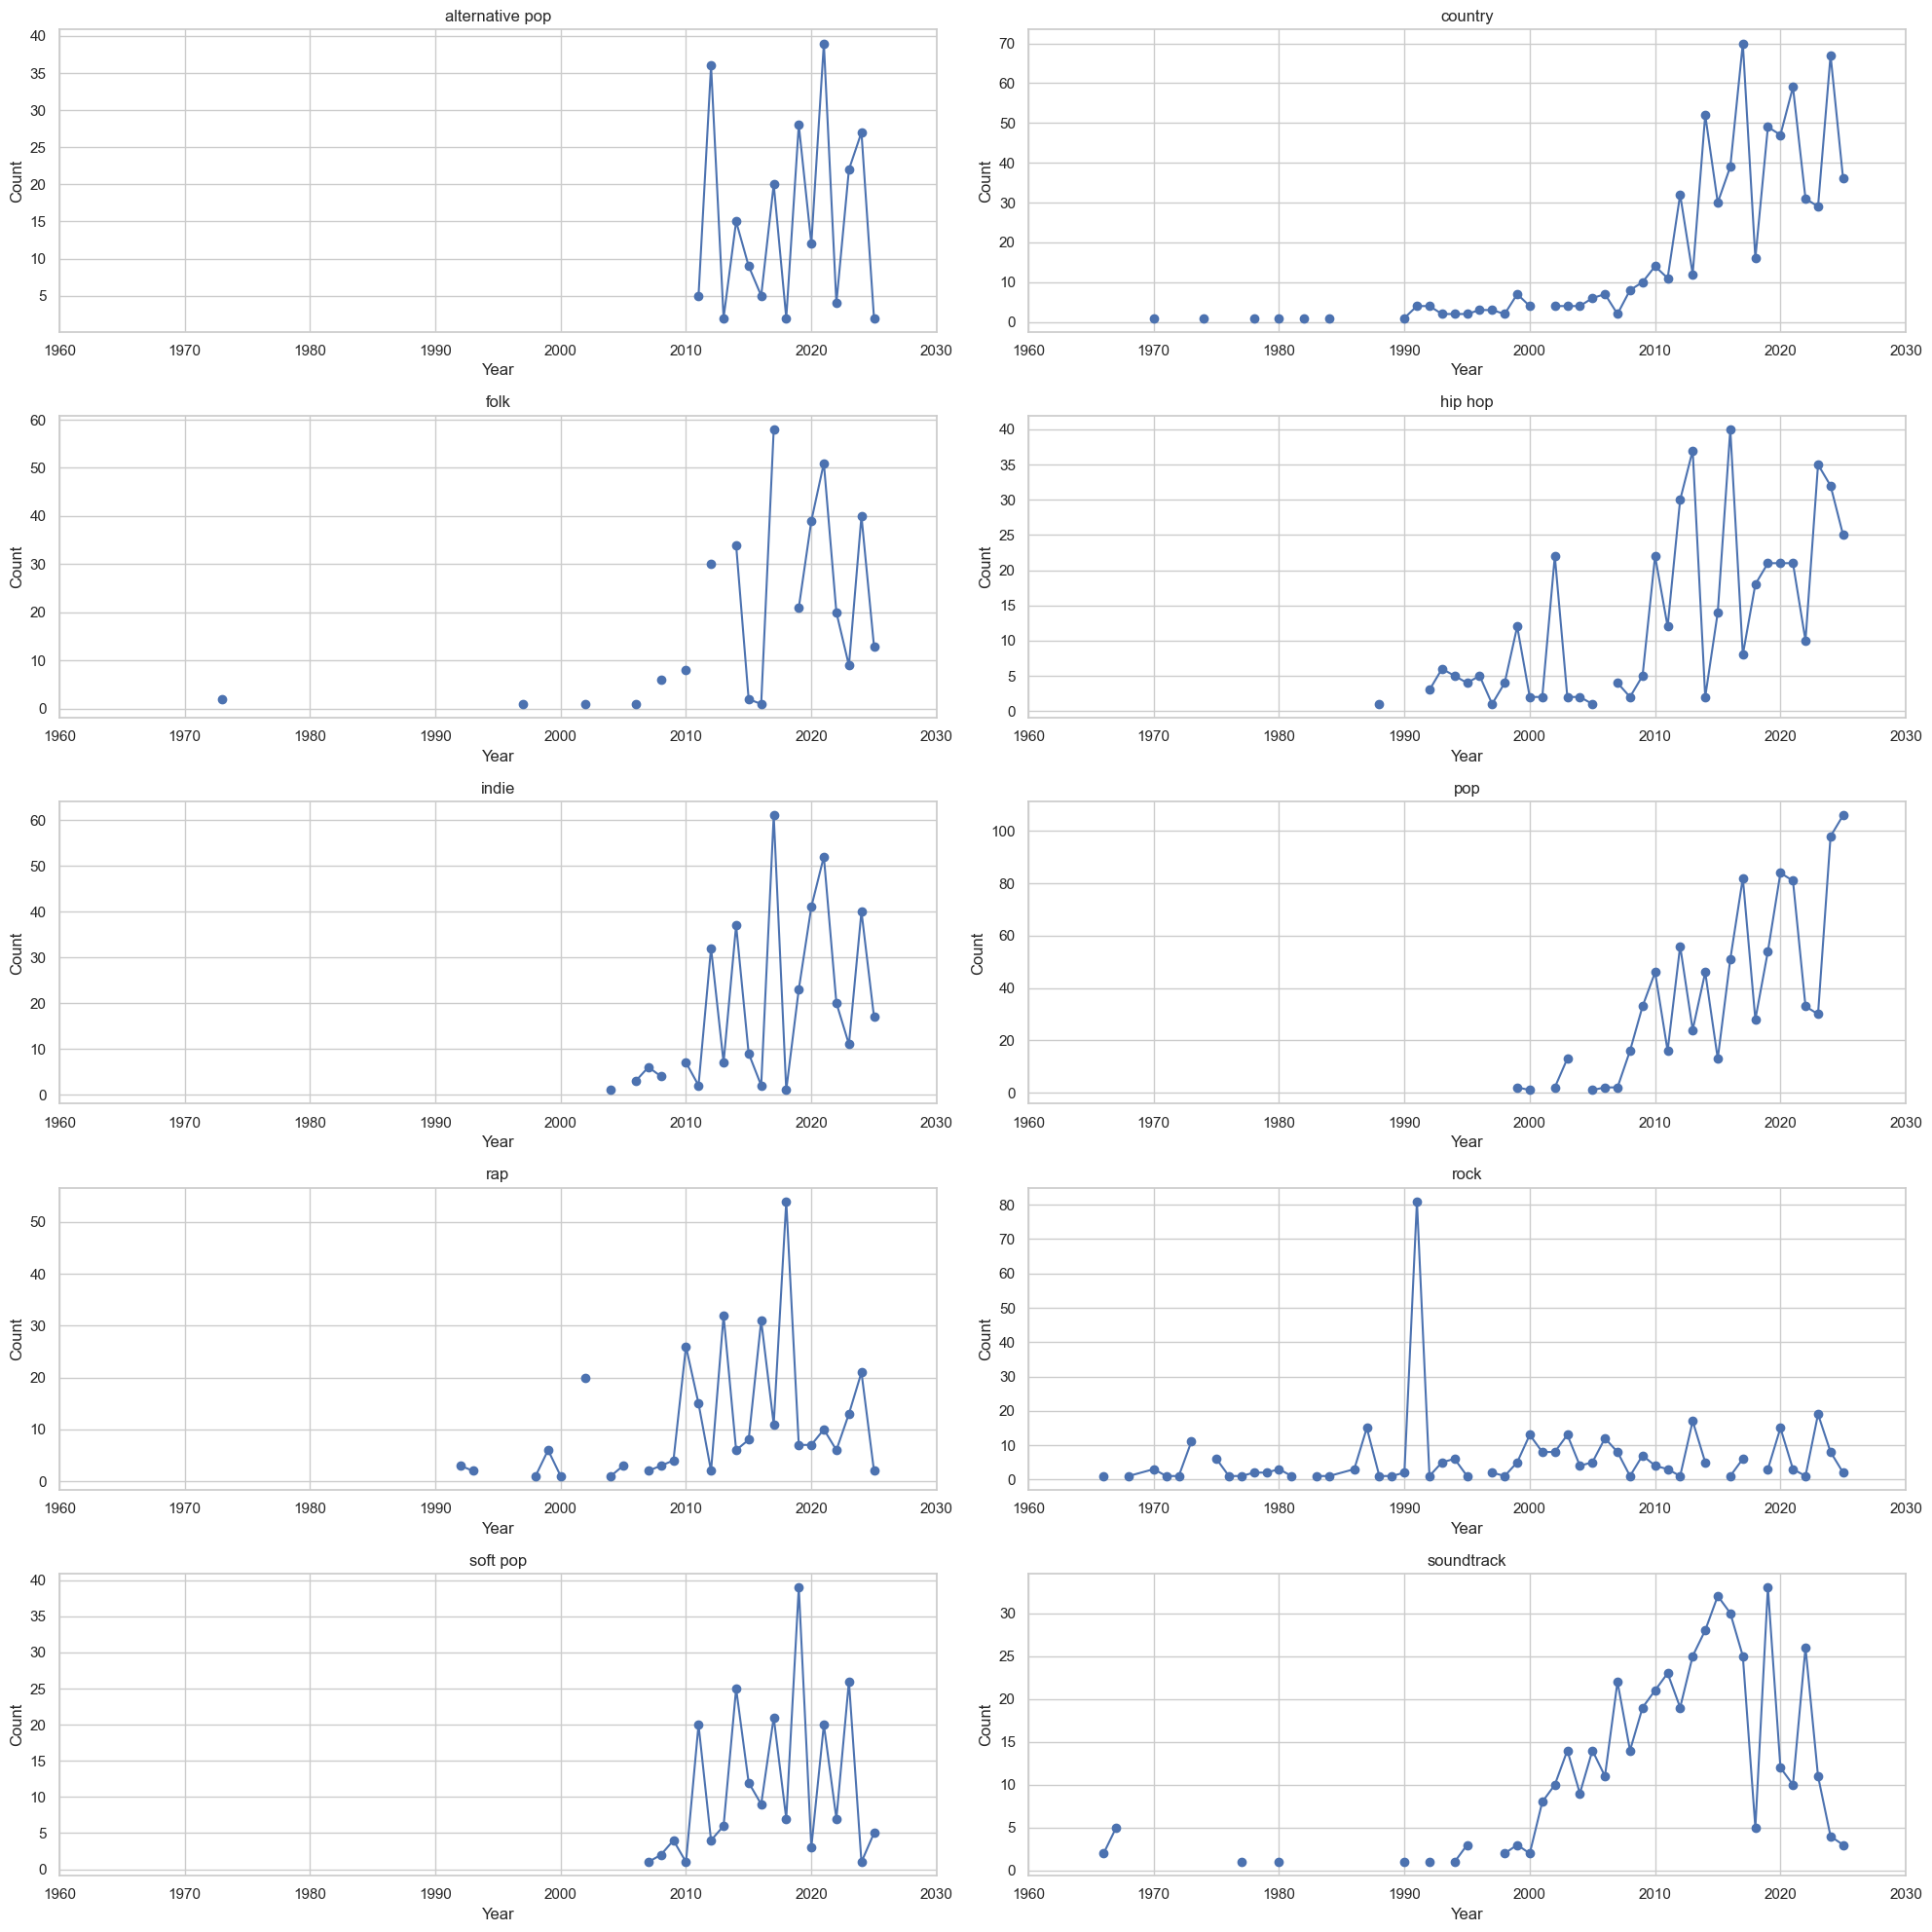

In [36]:
genre_year_count = df_top.groupby(['year', 'artist_genres']).size().reset_index(name='count')
pivot = genre_year_count.pivot(
    index='year',
    columns='artist_genres',
    values='count'
)
genres = pivot.columns   
n = len(genres)

fig, axes = plt.subplots(5, 2, figsize=(20, 20))  
axes = axes.flatten()    

for i, genre in enumerate(genres):
    ax = axes[i]
    
    ax.plot(pivot.index, pivot[genre], marker='o')
    ax.set_title(f"{genre}", fontsize=12)
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")
    ax.set_xlim([1960, 2030])
    ax.grid(True)

plt.tight_layout()
plt.show()

Kết luận:  
1. Tổng quan xu hướng chung
- Số lượng track tăng mạnh sau 2005–2010
- Trước 2000: hầu như không có dữ liệu (Spotify chưa phổ biến, bài cũ chưa được đưa lên nhiều).
- Từ 2010 trở đi: tất cả các thể loại đều tăng mạnh -> đúng với thời kỳ streaming bùng nổ.
- 2020–2023 là giai đoạn đỉnh cao khi rất nhiều thể loại đạt số track cao nhất vào giai đoạn này: pop, country, hip hop, indie, soundtrack,...  
    → Thời đại đại chúng hóa âm nhạc + số lượng nghệ sĩ bùng nổ.

2. Phân tích cụ thể từng thể loại nhạc:
- Pop, country, hip hop là 3 thể loại tăng trưởng mạnh và bền vững nhất.
- Rock suy giảm rõ rệt từ sau năm 1995.
- Alternative pop, indie, soft pop mang tính “trend-driven” → dao động mạnh theo năm.
- Soundtrack giảm sau 2020

### 3.3 Chiến lược phát hành nào hiệu quả hơn: Ra mắt bài hát dưới dạng 'Single' hay phát hành trong một 'Album' đầy đủ? Loại hình nào thường mang lại độ phổ biến (Popularity) cao hơn?

In [37]:
print("Các loại album có trong dữ liệu:", df['album_type'].unique())

df_q1 = df[df['album_type'].isin(['album', 'single','compilation'])].copy()

print(f"Số lượng bài hát sau khi lọc: {len(df_q1)}")
print(df_q1['album_type'].value_counts())

Các loại album có trong dữ liệu: ['album' 'single' 'compilation']
Số lượng bài hát sau khi lọc: 8582
album_type
album          5856
single         2219
compilation     507
Name: count, dtype: int64


In [38]:
stats = df_q1.groupby('album_type')['track_popularity'].agg(['mean', 'median', 'count', 'std'])
print("--- Bảng thống kê Popularity theo loại phát hành ---")
display(stats)

--- Bảng thống kê Popularity theo loại phát hành ---


,mean,median,count,std
album_type,,,,
album,55.66,61.00,5856,22.60
compilation,40.51,44.00,507,21.48
single,46.36,51.00,2219,25.39


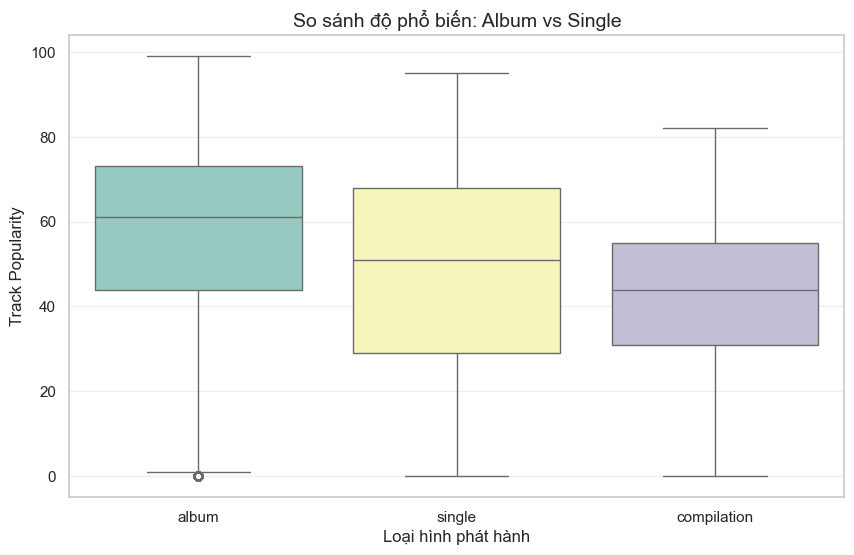

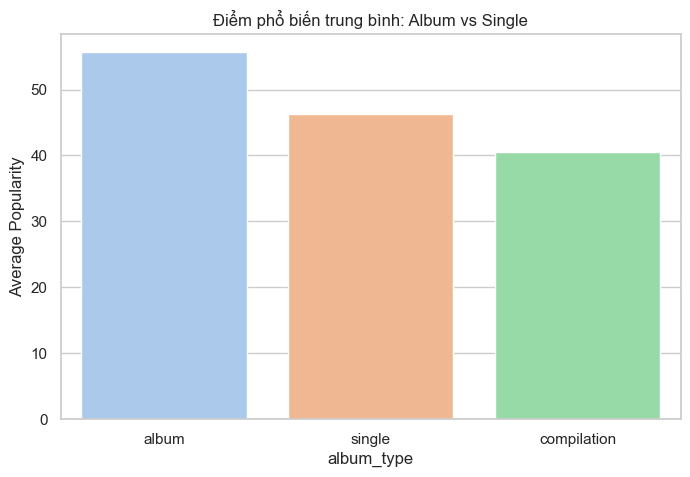

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_q1, x='album_type', y='track_popularity', palette='Set3')

plt.title('So sánh độ phổ biến: Album vs Single', fontsize=14)
plt.xlabel('Loại hình phát hành', fontsize=12)
plt.ylabel('Track Popularity', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=df_q1, x='album_type', y='track_popularity', estimator=np.mean, ci=None, palette='pastel')
plt.title('Điểm phổ biến trung bình: Album vs Single')
plt.ylabel('Average Popularity')
plt.show()

In [ ]:
mean_single = stats.loc['single', 'mean']
mean_album = stats.loc['album', 'mean']

print("Mean popularity of single: ", mean_single)
print("Mean popularity of album: ", mean_album)

Mean popularity of single:  46.35646687697161
Mean popularity of album:  55.65505464480874


Xu hướng chung: Album có độ phổ biến cao hơn Single
Kết quả cho thấy một sự chênh lệch rõ ràng về độ phổ biến (popularity) giữa các bài hát nằm trong Album và các bài hát dạng Single.
- Mean (Trung bình): Album đạt 55.66, cao hơn đáng kể so với Single là 46.36. Mức chênh lệch khoảng 9.3 điểm.
- Median (Trung vị): Album là 61.00, trong khi Single chỉ là 51.00. Việc Median của Album cao hơn 10 điểm cho thấy phần lớn các bản nhạc (track) trong album có xu hướng đạt điểm cao hơn, không chỉ bị kéo lên bởi các giá trị cực đại.

Biểu đồ Boxplot cung cấp cái nhìn sâu hơn về sự phân bố dữ liệu:
- Vị trí của Hộp (Box): Toàn bộ "hộp" (đại diện cho 50% dữ liệu ở giữa - IQR) của nhóm Album được dịch chuyển lên cao hơn so với nhóm Single.
- So sánh tứ phân vị: Đường Q1 (25% dữ liệu dưới cùng) của Album nằm ở mức khá cao, gần tiệm cận với mức Median của Single. Điều này có nghĩa là: khoảng 75% số lượng track trong Album có độ phổ biến cao hơn hoặc bằng mức trung bình khá của Single.

Trong tập dữ liệu này, loại hình phát hành là Album mang lại độ phổ biến (Popularity) cho bài hát tốt hơn so với phát hành dạng Single.

### 3.4. Dự đoán `track_popularity` bằng mô hình học máy

# 4. Data Analysis

## 4.1. Preprocessing

### 4.1.1 Chia train/test

In [40]:
# Loại bỏ những cột không có giá trị trong model

excluded_cols = ["track_id","track_name","artist_name",
                 "album_id","album_name","album_release_date"]

df = df.drop(excluded_cols, axis =1)

In [41]:
# Chia tập train/ test
from sklearn.model_selection import train_test_split
X = df.drop('track_popularity', axis = 1)
y = df['track_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 4.1.2. One hot encoding for categorical variables

In [ ]:
cat_cols = ["explicit", "album_type"]  

def one_hot_encode(train, test, column, prefix):
    train_dummies = pd.get_dummies(train[column], prefix=prefix)
    test_dummies = pd.get_dummies(test[column], prefix=prefix)

    train_dummies, test_dummies = train_dummies.align(
        test_dummies, join='left', axis=1, fill_value=0
    )

    train = pd.concat([train, train_dummies], axis=1)
    test = pd.concat([test, test_dummies], axis=1)

    train = train.drop(columns=[column])
    test = test.drop(columns=[column])
    return train, test


for col in cat_cols:
    X_train, X_test = one_hot_encode(X_train, X_test, col, prefix=col)

In [ ]:
def split_genres(x):
    if pd.isna(x):
        return []
    return [g.strip() for g in str(x).lower().split(",")]

def categorize(genres, top_genres):
    if len(genres) == 0:
        return ["unknown"]
    return [g if g in top_genres else "others" for g in genres]

X_train['genre_list'] = X_train['artist_genres'].replace("nan", pd.NA).apply(split_genres)

all_genres = Counter([g for sub in X_train['genre_list'] for g in sub])
top_5_genres = {g for g, _ in all_genres.most_common(5)}

X_train['genre_final'] = X_train['genre_list'].apply(lambda g: categorize(g, top_5_genres))

X_test['genre_list'] = X_test['artist_genres'].replace("nan", pd.NA).apply(split_genres)
X_test['genre_final'] = X_test['genre_list'].apply(lambda g: categorize(g, top_5_genres))

mlb = MultiLabelBinarizer()

genre_train = pd.DataFrame(
    mlb.fit_transform(X_train['genre_final']),
    columns=mlb.classes_,
    index=X_train.index
).add_prefix("genres_")

genre_test = pd.DataFrame(
    mlb.transform(X_test['genre_final']),
    columns=mlb.classes_,
    index=X_test.index
).add_prefix("genres_")

X_train = pd.concat([X_train, genre_train], axis=1)
X_test = pd.concat([X_test, genre_test], axis=1)

X_train = X_train.drop(columns=['genre_list','genre_final','artist_genres'])
X_test  = X_test.drop(columns=['genre_list','genre_final','artist_genres'])

In [44]:
X_train.head()

,track_number,artist_popularity,artist_followers,album_total_tracks,track_duration_min,year,explicit_False,explicit_True,album_type_album,album_type_compilation,album_type_single,genres_country,genres_hip hop,genres_indie,genres_others,genres_pop,genres_soundtrack,genres_unknown
6115,7,83,21591569,11,4.32,2013,False,True,True,False,False,0,0,0,0,0,0,1
5190,12,73,7218544,15,4.44,2015,False,True,True,False,False,0,0,0,0,0,0,1
8492,5,82,30714318,28,3.59,1973,True,False,False,True,False,0,0,0,1,0,0,0
4317,1,62,891423,1,4.24,2018,True,False,False,False,True,0,0,0,1,0,0,0
2197,1,76,13056061,1,2.85,2022,False,True,False,False,True,0,0,0,0,0,0,1


In [45]:
X_test.head()

,track_number,artist_popularity,artist_followers,album_total_tracks,track_duration_min,year,explicit_False,explicit_True,album_type_album,album_type_compilation,album_type_single,genres_country,genres_hip hop,genres_indie,genres_others,genres_pop,genres_soundtrack,genres_unknown
4951,14,72,4697897,20,3.64,2016,True,False,True,False,False,0,0,0,1,0,0,0
4825,14,85,47716988,18,3.65,2016,False,True,True,False,False,1,1,0,0,1,0,0
6741,6,86,17938214,15,5.09,2011,False,True,True,False,False,0,1,0,1,0,0,0
222,3,20,696,4,3.57,2025,True,False,False,False,True,0,0,0,0,0,0,1
5746,4,49,764106,12,4.85,2014,False,True,True,False,False,0,0,0,1,0,0,0


### 4.1.3. Feature engineering

In [ ]:
print("--- Đang xử lý Feature Engineering ---")

if 'artist_followers' in df.columns and 'artist_popularity' in df.columns:
    df['followers_per_pop'] = df['artist_followers'] / (df['artist_popularity'] + 1)

if 'explicit' in df.columns:
    if df['explicit'].dtype == 'object':
         df['explicit'] = df['explicit'].apply(lambda x: 1 if str(x).lower() == 'true' else 0)
    else:
         df['explicit'] = df['explicit'].astype(int)

if 'album_type' in df.columns:
    df = pd.get_dummies(df, columns=['album_type'], drop_first=True)
cols_to_drop = [
    "track_id", "track_name", "artist_name", 
    "album_id", "album_name", "album_release_date", 
    "artist_genres"
]

df_clean = df.drop(columns=cols_to_drop, errors='ignore')
target_col = 'track_popularity'

if target_col not in df_clean.columns:
    print(f"❌ LỖI: Không tìm thấy cột target '{target_col}'")
else:
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    potential_numeric = [
        'track_number', 'artist_popularity', 'artist_followers', 
        'album_total_tracks', 'track_duration_min',
        'followers_per_pop' 
    ]
    num_cols = [c for c in potential_numeric if c in X.columns]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    skew_limit = 0.75
    cols_to_log = []
    
    print("\n--- Kiểm tra độ lệch (Skewness) ---")
    for col in num_cols:
        skew_val = X_train[col].skew()
        if abs(skew_val) > skew_limit:
            cols_to_log.append(col)
    
    print(f"=> Các cột sẽ Log-transform: {cols_to_log}")

    for col in cols_to_log:
        X_train[col] = np.log1p(X_train[col])
        X_test[col] = np.log1p(X_test[col])
        X_train.rename(columns={col: f"{col}_log"}, inplace=True)
        X_test.rename(columns={col: f"{col}_log"}, inplace=True)
    scale_cols = []
    for col in num_cols:
        if col in cols_to_log:
            scale_cols.append(f"{col}_log")
        else:
            scale_cols.append(col)

    scaler = StandardScaler()
    scaler.fit(X_train[scale_cols])
    
    X_train[scale_cols] = scaler.transform(X_train[scale_cols])
    X_test[scale_cols] = scaler.transform(X_test[scale_cols])

    print("\n✅ HOÀN TẤT! Dữ liệu đã sạch sẽ.")
    print("5 dòng đầu của tập Train:")
    print(X_train.head())

--- Đang xử lý Feature Engineering ---

--- Kiểm tra độ lệch (Skewness) ---
=> Các cột sẽ Log-transform: ['track_number', 'artist_popularity', 'artist_followers', 'album_total_tracks', 'track_duration_min', 'followers_per_pop']

✅ HOÀN TẤT! Dữ liệu đã sạch sẽ.
5 dòng đầu của tập Train:
      track_number_log  explicit  artist_popularity_log  artist_followers_log  \
2812              0.02         0                  -0.08                 -0.42   
58               -1.14         0                  -2.66                 -2.84   
6719              1.13         0                   0.52                  1.00   
6688              0.02         1                   0.63                  0.73   
6427             -0.62         0                   0.15                  0.16   

      album_total_tracks_log  track_duration_min_log  year  \
2812                    0.79                    0.78  2021   
58                     -1.76                    0.89  2025   
6719                    0.15            

### 4.1.4 Log-transform

### 4.1.4 Standard Scaler

# 5. Train Model

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

models = {
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    "LightGBM": LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        random_state=42
    )
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)

    print(f"\n=== {name} ===")
    print("RMSE:", rmse)
    print("R²:", r2)


=== RandomForest ===
RMSE: 19.11962391164197
R²: 0.3849447776147843

=== XGBoost ===
RMSE: 19.14104511656291
R²: 0.3835657835006714
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 6865, number of used features: 10
[LightGBM] [Info] Start training from score 52.464967

=== LightGBM ===
RMSE: 19.387545226146365
R²: 0.36758659401599725
